# Credit Card Prediction Analysis!

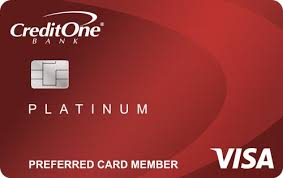

# Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.
 


# Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extracting data using two data sources

In [2]:
app = pd.read_csv("./data/application_record.csv")
crecord = pd.read_csv("./data/credit_record.csv")

* Using different methods to understand data
* data is complex and both dataset need some kind of transformation before analysis
* datasets are indivudally dealt with and then eventually compiled using joins

In [3]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
crecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [5]:
app['ID'].nunique() # the total rows are 438,557. This means it has duplicates

438510

In [6]:
crecord['ID'].nunique() 
# this has around 43,000 unique rows as there are repeating entries for different monthly values and status.

45985

In [7]:
len(set(crecord['ID']).intersection(set(app['ID']))) # checking to see how many records match in two datasets

36457

<AxesSubplot:>

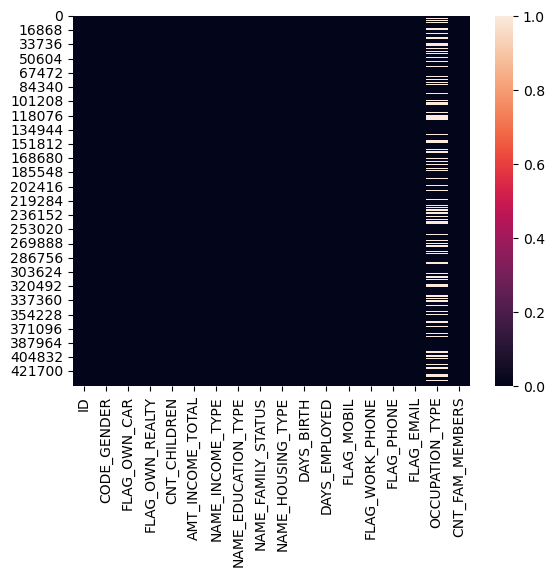

In [8]:
sns.heatmap(app.isnull()) # checking for null values. All good here!

<AxesSubplot:>

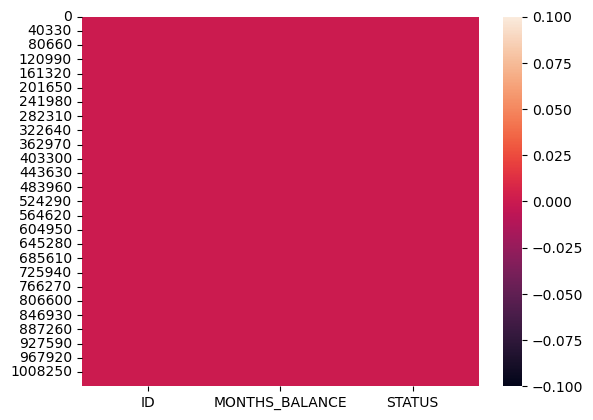

In [9]:
sns.heatmap(crecord.isnull()) # checking for null values. All good here!

In [10]:
app = app.drop_duplicates('ID', keep='last') 
# we identified that there are some duplicates in this dataset
# we will be deleting those duplicates and will keep the last entry of the ID if its repeated.

In [11]:
app.drop('OCCUPATION_TYPE', axis=1, inplace=True) 
#we identified earlier that occupation_type has many missing values
# we will drop this column

In [12]:
ot = pd.DataFrame(app.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type
#we are filtering the columns that have non numeric values to see if they are useful

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [13]:
num_type = pd.DataFrame(app.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']
#HAVE CREATED SEPARATE LIST FOR NUMERIC TYPE INCASE IT WILL BE NEEDED IN FURTHER ANALYSIS
# IT IS NEEDED IN FURTHER ANALYSIS

In [14]:
a = app[object_type]['CODE_GENDER'].value_counts()
b = app[object_type]['FLAG_OWN_CAR'].value_counts()
c = app[object_type]['FLAG_OWN_REALTY'].value_counts()
d = app[object_type]['NAME_INCOME_TYPE'].value_counts()
e = app[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = app[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = app[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a,"\n",b,'\n', c, '\n', d, '\n', e, '\n', f, '\n', g)

#this is just to see what each column is. 
#It seems that all of them are important since there is very fine classifcation in each column.
# their effectiveness cannot be judged at this moment so we convert all of them to numeric values.

F    294412
M    144098
Name: CODE_GENDER, dtype: int64 
 N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64 
 Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64 
 Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64 
 Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64 
 Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64 
 House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAM

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in app:
    if app[x].dtypes=='object':
        app[x] = le.fit_transform(app[x])
# we have transformed all the non numeric data columns into data columns
# this method applies 0,1.. classification to different value types.

In [16]:
app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0


In [17]:
app[num_type].head()
# We will look at numeric columns and see if there is anything that needs to be changed. 

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0


<AxesSubplot:ylabel='Frequency'>

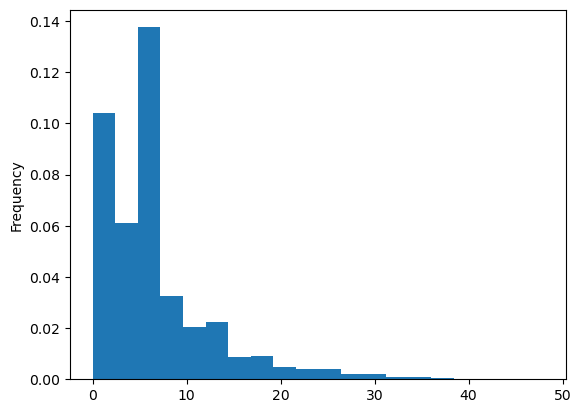

In [18]:
app['worktm']=-(app['DAYS_EMPLOYED'])//365	
app[app['worktm']<0] = np.nan # replace by na
app['DAYS_EMPLOYED']
app['worktm'].fillna(app['worktm'].mean(),inplace=True) #replace na by mean
app['worktm'].plot(kind='hist',bins=20,density=True)


<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

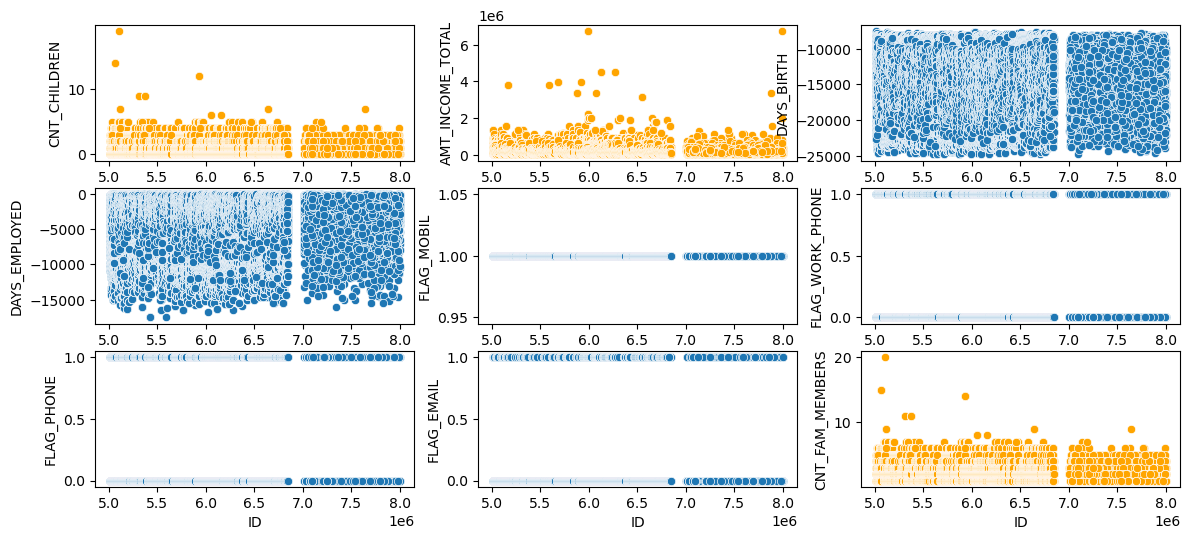

In [19]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))


sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

There are outliers in 3 columns.
1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. CNT_FAM_MEMBERS

* We need to remove these outliers to make sure they do not affect our model results. 
* We will now remove these outliers. 

In [20]:
# FOR CNT_CHILDREN COLUMN
q_hi = app['CNT_CHILDREN'].quantile(0.999)
q_low = app['CNT_CHILDREN'].quantile(0.001)
app = app[(app['CNT_CHILDREN']>q_low) & (app['CNT_CHILDREN']<q_hi)]

In [21]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = app['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app['AMT_INCOME_TOTAL'].quantile(0.001)
app= app[(app['AMT_INCOME_TOTAL']>q_low) & (app['AMT_INCOME_TOTAL']<q_hi)]

In [22]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = app['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app['CNT_FAM_MEMBERS'].quantile(0.001)
app= app[(app['CNT_FAM_MEMBERS']>q_low) & (app['CNT_FAM_MEMBERS']<q_hi)]

<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

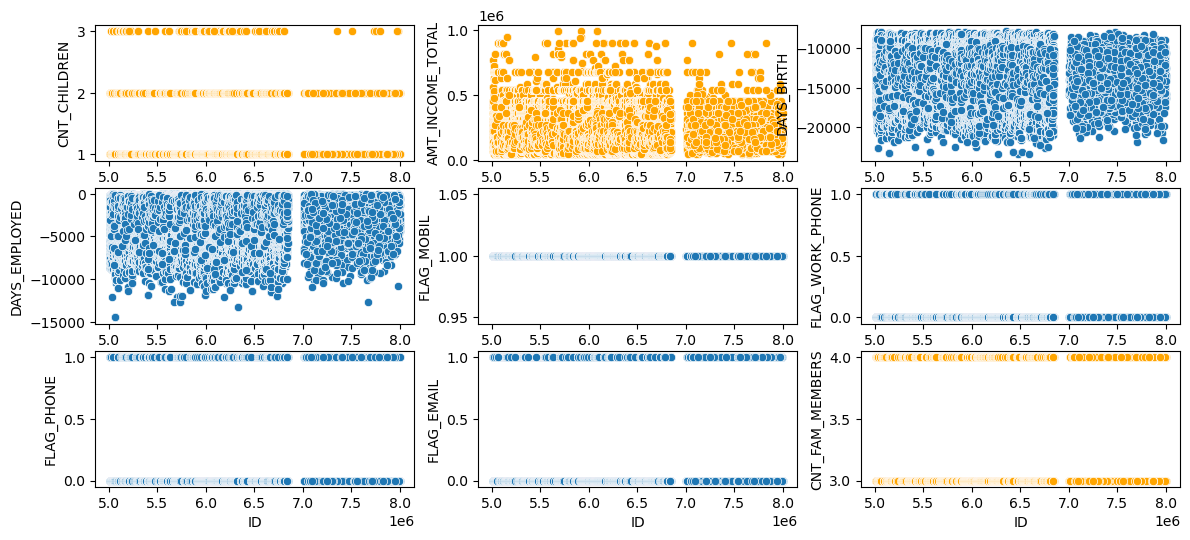

In [23]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))


sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

In [24]:
crecord['Months from today'] = crecord['MONTHS_BALANCE']*-1
crecord = crecord.sort_values(['ID','Months from today'], ascending=True)
crecord.head(10)
# we calculated months from today column to see how much old is the month
# we also sort the data according to ID and Months from today columns. 

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


In [25]:
crecord['STATUS'].value_counts() 
# performed a value count on status to see how many values exist of each type

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [26]:
crecord['STATUS'].replace({'C': 0, 'X' : 0 }, inplace=True)
crecord['STATUS'] = crecord['STATUS'].astype('int')
crecord['STATUS'] = crecord['STATUS'].apply(lambda x:1 if x >= 2 else 0)
# replace the value C and X with 0 as it is the same type
# 1,2,3,4,5 are classified as 1 because they are the same type
# these will be our labels/prediction results for our model

In [27]:
crecord['STATUS'].value_counts(normalize=True) 
# there is a problem here
# the data is oversampled for the labels
# 0 are 99%
# 1 are only 1% in the whole dataset
# we will need to address the oversampling issue in order to make sense of our analysis
# this will be done after when we combine both the datasets
# so first we will join the datasets

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

In [28]:
crecordgb = crecord.groupby('ID').agg(max).reset_index()
crecordgb.head() 
#we are grouping the data in crecord by ID so that we can join it with app

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [29]:
crecord['STATUS'].value_counts(normalize=True) 

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

In [30]:
df = app.join(crecordgb.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()
# no that this is joined, we will solve over sampling issue

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,worktm,STATUS
29,5008838.0,1.0,0.0,1.0,1.0,405000.0,0.0,1.0,1.0,1.0,-11842.0,-2016.0,1.0,0.0,0.0,0.0,3.0,5.0,0
30,5008839.0,1.0,0.0,1.0,1.0,405000.0,0.0,1.0,1.0,1.0,-11842.0,-2016.0,1.0,0.0,0.0,0.0,3.0,5.0,0
31,5008840.0,1.0,0.0,1.0,1.0,405000.0,0.0,1.0,1.0,1.0,-11842.0,-2016.0,1.0,0.0,0.0,0.0,3.0,5.0,0
32,5008841.0,1.0,0.0,1.0,1.0,405000.0,0.0,1.0,1.0,1.0,-11842.0,-2016.0,1.0,0.0,0.0,0.0,3.0,5.0,0
33,5008842.0,1.0,0.0,1.0,1.0,405000.0,0.0,1.0,1.0,1.0,-11842.0,-2016.0,1.0,0.0,0.0,0.0,3.0,5.0,0


df.info() # checking for number of rows. 
# there are 9516 rows.

In [31]:
df.info() # checking for number of rows. 
# there are 9516 rows.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9303 entries, 29 to 434805
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9303 non-null   float64
 1   CODE_GENDER          9303 non-null   float64
 2   FLAG_OWN_CAR         9303 non-null   float64
 3   FLAG_OWN_REALTY      9303 non-null   float64
 4   CNT_CHILDREN         9303 non-null   float64
 5   AMT_INCOME_TOTAL     9303 non-null   float64
 6   NAME_INCOME_TYPE     9303 non-null   float64
 7   NAME_EDUCATION_TYPE  9303 non-null   float64
 8   NAME_FAMILY_STATUS   9303 non-null   float64
 9   NAME_HOUSING_TYPE    9303 non-null   float64
 10  DAYS_BIRTH           9303 non-null   float64
 11  DAYS_EMPLOYED        9303 non-null   float64
 12  FLAG_MOBIL           9303 non-null   float64
 13  FLAG_WORK_PHONE      9303 non-null   float64
 14  FLAG_PHONE           9303 non-null   float64
 15  FLAG_EMAIL           9303 non-null 

In [32]:
X = df.iloc[:,1:-1] # X value contains all the variables except labels
y = df.iloc[:,-1] # these are the labels

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
# we create the test train split first

In [34]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)
# we have now fit and transform the data into a scaler for accurate reading and results.

In [50]:
# RUN FOR UNDERSAMPLING
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = rus.fit_resample(X_test_scaled, y_test)

In [35]:
#RUN FOR SMOTE (OVERSAMPLING)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)
# we have addressed the issue of oversampling here

In [36]:
y_train.value_counts()

0    6416
1      96
Name: STATUS, dtype: int64

In [37]:
y_balanced.value_counts()

0    6416
1    6416
Name: STATUS, dtype: int64

In [38]:
y_test.value_counts()

0    2740
1      51
Name: STATUS, dtype: int64

In [39]:
y_test_balanced.value_counts()

0    2740
1    2740
Name: STATUS, dtype: int64

* We notice in the value counts above that label types are now balanced
* the problem of oversampling is solved now
* we will now implement different models to see which one performs the best

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import warnings 
warnings.filterwarnings ('ignore', category=FutureWarning)

# The Classifiers We are Going to use are the following:

In [42]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svc =  SVC()
decision = DecisionTreeClassifier()
randomforest= RandomForestClassifier()
xgboost= XGBClassifier()

# Logistic Regression

In [100]:
# further scaling is necessary to improve results
scaler = preprocessing.Normalizer(norm='l2') 
scaler.fit(X_balanced)

lr_training = scaler.transform(X_balanced)
lr_testing = scaler.transform(X_test_balanced)

In [101]:
parameters = {'C':[1,2, 3, 4, 5,0.5,10], 'penalty':['l2'],'max_iter' : [2000], 'solver' : ['lbfgs','newton-cg','saga']}

lr_cv = GridSearchCV(logreg, param_grid = parameters, cv=5, verbose = 10)

lr_cv.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START C=1, max_iter=2000, penalty=l2, solver=lbfgs...............
[CV 1/5; 1/21] END C=1, max_iter=2000, penalty=l2, solver=lbfgs;, score=0.629 total time=   0.0s
[CV 2/5; 1/21] START C=1, max_iter=2000, penalty=l2, solver=lbfgs...............
[CV 2/5; 1/21] END C=1, max_iter=2000, penalty=l2, solver=lbfgs;, score=0.618 total time=   0.0s
[CV 3/5; 1/21] START C=1, max_iter=2000, penalty=l2, solver=lbfgs...............
[CV 3/5; 1/21] END C=1, max_iter=2000, penalty=l2, solver=lbfgs;, score=0.624 total time=   0.0s
[CV 4/5; 1/21] START C=1, max_iter=2000, penalty=l2, solver=lbfgs...............
[CV 4/5; 1/21] END C=1, max_iter=2000, penalty=l2, solver=lbfgs;, score=0.659 total time=   0.0s
[CV 5/5; 1/21] START C=1, max_iter=2000, penalty=l2, solver=lbfgs...............
[CV 5/5; 1/21] END C=1, max_iter=2000, penalty=l2, solver=lbfgs;, score=0.631 total time=   0.0s
[CV 1/5; 2/21] START C=1, max_iter=2000, penalty

[CV 4/5; 10/21] END C=4, max_iter=2000, penalty=l2, solver=lbfgs;, score=0.664 total time=   0.0s
[CV 5/5; 10/21] START C=4, max_iter=2000, penalty=l2, solver=lbfgs..............
[CV 5/5; 10/21] END C=4, max_iter=2000, penalty=l2, solver=lbfgs;, score=0.631 total time=   0.0s
[CV 1/5; 11/21] START C=4, max_iter=2000, penalty=l2, solver=newton-cg..........
[CV 1/5; 11/21] END C=4, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.633 total time=   0.0s
[CV 2/5; 11/21] START C=4, max_iter=2000, penalty=l2, solver=newton-cg..........
[CV 2/5; 11/21] END C=4, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.624 total time=   0.0s
[CV 3/5; 11/21] START C=4, max_iter=2000, penalty=l2, solver=newton-cg..........
[CV 3/5; 11/21] END C=4, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.628 total time=   0.0s
[CV 4/5; 11/21] START C=4, max_iter=2000, penalty=l2, solver=newton-cg..........
[CV 4/5; 11/21] END C=4, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.664 total time

[CV 3/5; 20/21] END C=10, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.627 total time=   0.0s
[CV 4/5; 20/21] START C=10, max_iter=2000, penalty=l2, solver=newton-cg.........
[CV 4/5; 20/21] END C=10, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.666 total time=   0.0s
[CV 5/5; 20/21] START C=10, max_iter=2000, penalty=l2, solver=newton-cg.........
[CV 5/5; 20/21] END C=10, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.638 total time=   0.0s
[CV 1/5; 21/21] START C=10, max_iter=2000, penalty=l2, solver=saga..............
[CV 1/5; 21/21] END C=10, max_iter=2000, penalty=l2, solver=saga;, score=0.635 total time=   0.3s
[CV 2/5; 21/21] START C=10, max_iter=2000, penalty=l2, solver=saga..............
[CV 2/5; 21/21] END C=10, max_iter=2000, penalty=l2, solver=saga;, score=0.623 total time=   0.4s
[CV 3/5; 21/21] START C=10, max_iter=2000, penalty=l2, solver=saga..............
[CV 3/5; 21/21] END C=10, max_iter=2000, penalty=l2, solver=saga;, score=0.627 total time=

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 0.5, 10], 'max_iter': [2000],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg', 'saga']},
             verbose=10)

# Parameters:

In [102]:
#Best Params
print(lr_cv.best_params_)
#Best Score
print(lr_cv.best_score_)

{'C': 10, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga'}
0.6378452062432863


In [103]:
lr_model =LogisticRegression(C=3, max_iter = 2000, solver = 'liblinear')
lr_model.fit(X_balanced, y_balanced)
lr_model.score(X_test_balanced, y_test_balanced)

0.6367116296026248

In [104]:
def LogisticRegressionClassifier(train_data, train_labels, test_data, max_iter = 2000, penalty = 'l2', dual = False, C = 1, solver = 'lbfgs'):
    lr = LogisticRegression(penalty = penalty, dual = dual, C = C, solver = solver, max_iter = max_iter) 
    lr.fit(train_data, train_labels) 
    predicted_train_labels = lr.predict(train_data) 
    predicted_test_labels = lr.predict(test_data) 
    print("5-fold cross validation: ",model_selection.cross_val_score(lr, train_data, train_labels, cv=5).mean()) 
    return predicted_train_labels, predicted_test_labels 

In [105]:
C = [0.1,1,10,100,1000]
solver = ['lbfgs','newton-cg','saga','liblinear']
for solv in solver:
  for c in C:
    predicted_train_lr, predicted_test_lr = LogisticRegressionClassifier(lr_training, y_balanced, lr_testing, C = c, solver = solv)
    print("Test accuracy for",solv,"solver and C=",c,": " ,accuracy_score(predicted_test_lr, y_test_balanced))

5-fold cross validation:  0.6383124347631874
Test accuracy for lbfgs solver and C= 0.1 :  0.6707983959168793
5-fold cross validation:  0.7057545743635091
Test accuracy for lbfgs solver and C= 1 :  0.7457163689391177
5-fold cross validation:  0.7324966916294807
Test accuracy for lbfgs solver and C= 10 :  0.7717827196500182
5-fold cross validation:  0.7417747755549782
Test accuracy for lbfgs solver and C= 100 :  0.7754283631060882
5-fold cross validation:  0.7425544114898834
Test accuracy for lbfgs solver and C= 1000 :  0.7757929274516953
5-fold cross validation:  0.6383124347631874
Test accuracy for newton-cg solver and C= 0.1 :  0.6706161137440758
5-fold cross validation:  0.7056766016539574
Test accuracy for newton-cg solver and C= 1 :  0.7457163689391177
5-fold cross validation:  0.732418718919929
Test accuracy for newton-cg solver and C= 10 :  0.7719650018228217
5-fold cross validation:  0.7417747755549782
Test accuracy for newton-cg solver and C= 100 :  0.7757929274516953
5-fold cr

# KNN

In [112]:
parameters = {'algorithm' : ['auto'],'n_neighbors' : [20,200,250,500,1000], 'leaf_size':[1,2,3,5,10]}

knn_cv = GridSearchCV(knn, param_grid = parameters, cv=5, verbose = 10)

knn_cv.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START algorithm=auto, leaf_size=1, n_neighbors=20................
[CV 1/5; 1/25] END algorithm=auto, leaf_size=1, n_neighbors=20;, score=0.917 total time=   0.5s
[CV 2/5; 1/25] START algorithm=auto, leaf_size=1, n_neighbors=20................
[CV 2/5; 1/25] END algorithm=auto, leaf_size=1, n_neighbors=20;, score=0.919 total time=   0.4s
[CV 3/5; 1/25] START algorithm=auto, leaf_size=1, n_neighbors=20................
[CV 3/5; 1/25] END algorithm=auto, leaf_size=1, n_neighbors=20;, score=0.926 total time=   0.5s
[CV 4/5; 1/25] START algorithm=auto, leaf_size=1, n_neighbors=20................
[CV 4/5; 1/25] END algorithm=auto, leaf_size=1, n_neighbors=20;, score=0.924 total time=   0.4s
[CV 5/5; 1/25] START algorithm=auto, leaf_size=1, n_neighbors=20................
[CV 5/5; 1/25] END algorithm=auto, leaf_size=1, n_neighbors=20;, score=0.932 total time=   0.5s
[CV 1/5; 2/25] START algorithm=auto, leaf_size=1, n_n

[CV 2/5; 10/25] END algorithm=auto, leaf_size=2, n_neighbors=1000;, score=0.607 total time=   0.7s
[CV 3/5; 10/25] START algorithm=auto, leaf_size=2, n_neighbors=1000.............
[CV 3/5; 10/25] END algorithm=auto, leaf_size=2, n_neighbors=1000;, score=0.614 total time=   0.8s
[CV 4/5; 10/25] START algorithm=auto, leaf_size=2, n_neighbors=1000.............
[CV 4/5; 10/25] END algorithm=auto, leaf_size=2, n_neighbors=1000;, score=0.623 total time=   0.7s
[CV 5/5; 10/25] START algorithm=auto, leaf_size=2, n_neighbors=1000.............
[CV 5/5; 10/25] END algorithm=auto, leaf_size=2, n_neighbors=1000;, score=0.619 total time=   0.7s
[CV 1/5; 11/25] START algorithm=auto, leaf_size=3, n_neighbors=20...............
[CV 1/5; 11/25] END algorithm=auto, leaf_size=3, n_neighbors=20;, score=0.917 total time=   0.5s
[CV 2/5; 11/25] START algorithm=auto, leaf_size=3, n_neighbors=20...............
[CV 2/5; 11/25] END algorithm=auto, leaf_size=3, n_neighbors=20;, score=0.919 total time=   0.5s
[CV 3

[CV 3/5; 19/25] END algorithm=auto, leaf_size=5, n_neighbors=500;, score=0.674 total time=   0.6s
[CV 4/5; 19/25] START algorithm=auto, leaf_size=5, n_neighbors=500..............
[CV 4/5; 19/25] END algorithm=auto, leaf_size=5, n_neighbors=500;, score=0.680 total time=   0.6s
[CV 5/5; 19/25] START algorithm=auto, leaf_size=5, n_neighbors=500..............
[CV 5/5; 19/25] END algorithm=auto, leaf_size=5, n_neighbors=500;, score=0.686 total time=   0.6s
[CV 1/5; 20/25] START algorithm=auto, leaf_size=5, n_neighbors=1000.............
[CV 1/5; 20/25] END algorithm=auto, leaf_size=5, n_neighbors=1000;, score=0.621 total time=   0.8s
[CV 2/5; 20/25] START algorithm=auto, leaf_size=5, n_neighbors=1000.............
[CV 2/5; 20/25] END algorithm=auto, leaf_size=5, n_neighbors=1000;, score=0.607 total time=   0.7s
[CV 3/5; 20/25] START algorithm=auto, leaf_size=5, n_neighbors=1000.............
[CV 3/5; 20/25] END algorithm=auto, leaf_size=5, n_neighbors=1000;, score=0.614 total time=   0.8s
[CV 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [1, 2, 3, 5, 10],
                         'n_neighbors': [20, 200, 250, 500, 1000]},
             verbose=10)

In [117]:
#Best Params
print(knn_cv.best_params_)
#Best Score
print(knn_cv.best_score_)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 20}
0.9235932170427802


In [118]:
#%%
knn_model = KNeighborsClassifier(leaf_size=1,n_neighbors = 20)
knn_model.fit(X_balanced, y_balanced)
knn_model.score(X_test_balanced, y_test_balanced)

0.7996718920889537

In [109]:
def kNNclassifier(train_data, train_labels, test_data, neighbours, leaf_size):
    knn = KNeighborsClassifier(n_neighbors = neighbours, leaf_size = leaf_size) #declare the classifier
    knn.fit(train_data, train_labels) # fit the data
    predicted_train_labels = knn.predict(train_data) #predict
    predicted_test_labels = knn.predict(test_data) #and another prediction
    print(model_selection.cross_val_score(knn, train_data, train_labels, cv=5).mean()) #cross-validate it 5 times, as usual
    return predicted_train_labels, predicted_test_labels #return these because why not, we need them

In [114]:
neighbours = [3,5,7,10,20,200,250,500]
#neighbours = [3,5,7,10,20,200]
leaves = [1,2,3,5,10]
for n in neighbours:
  for l in leaves:
    predicted_train, predicted_test = kNNclassifier(X_balanced, y_balanced, X_test_balanced, n, l)
    print("Test accuracy for",n,"neighbours and ",l," leaves: " ,accuracy_score(predicted_test, y_test_balanced))

0.9552494078358624
Test accuracy for 3 neighbours and  1  leaves:  0.7847247539190667
0.9552494078358624
Test accuracy for 3 neighbours and  2  leaves:  0.7847247539190667
0.9552494078358624
Test accuracy for 3 neighbours and  3  leaves:  0.7847247539190667
0.9552494078358624
Test accuracy for 3 neighbours and  5  leaves:  0.7847247539190667
0.9552494078358624
Test accuracy for 3 neighbours and  10  leaves:  0.7847247539190667
0.969671745832061
Test accuracy for 5 neighbours and  1  leaves:  0.7907400656215822
0.969671745832061
Test accuracy for 5 neighbours and  2  leaves:  0.7907400656215822
0.969671745832061
Test accuracy for 5 neighbours and  3  leaves:  0.7907400656215822
0.969671745832061
Test accuracy for 5 neighbours and  5  leaves:  0.7907400656215822
0.969671745832061
Test accuracy for 5 neighbours and  10  leaves:  0.7907400656215822
0.9609393493259433
Test accuracy for 7 neighbours and  1  leaves:  0.8197229310973386
0.9609393493259433
Test accuracy for 7 neighbours and  2 

# SVM


In [121]:
parameters = {'kernel': ['linear','rbf','poly'], 'C': [10,5,3,2,1,0.5], 'gamma': [0.001,0.01,0.1]}


svm_cv = GridSearchCV(svc, parameters, cv=3, verbose = 100)
svm_cv.fit(X_balanced, y_balanced)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3; 1/54] START C=10, gamma=0.001, kernel=linear...........................
[CV 1/3; 1/54] END C=10, gamma=0.001, kernel=linear;, score=0.620 total time=   5.2s
[CV 2/3; 1/54] START C=10, gamma=0.001, kernel=linear...........................
[CV 2/3; 1/54] END C=10, gamma=0.001, kernel=linear;, score=0.619 total time=   4.7s
[CV 3/3; 1/54] START C=10, gamma=0.001, kernel=linear...........................
[CV 3/3; 1/54] END C=10, gamma=0.001, kernel=linear;, score=0.649 total time=   4.9s
[CV 1/3; 2/54] START C=10, gamma=0.001, kernel=rbf..............................
[CV 1/3; 2/54] END C=10, gamma=0.001, kernel=rbf;, score=0.584 total time=   6.3s
[CV 2/3; 2/54] START C=10, gamma=0.001, kernel=rbf..............................
[CV 2/3; 2/54] END C=10, gamma=0.001, kernel=rbf;, score=0.586 total time=   6.3s
[CV 3/3; 2/54] START C=10, gamma=0.001, kernel=rbf..............................
[CV 3/3; 2/54] END C=10, gamma=0.

[CV 3/3; 17/54] END .C=5, gamma=0.1, kernel=rbf;, score=0.897 total time=   3.3s
[CV 1/3; 18/54] START C=5, gamma=0.1, kernel=poly...............................
[CV 1/3; 18/54] END C=5, gamma=0.1, kernel=poly;, score=0.828 total time=   2.3s
[CV 2/3; 18/54] START C=5, gamma=0.1, kernel=poly...............................
[CV 2/3; 18/54] END C=5, gamma=0.1, kernel=poly;, score=0.850 total time=   2.4s
[CV 3/3; 18/54] START C=5, gamma=0.1, kernel=poly...............................
[CV 3/3; 18/54] END C=5, gamma=0.1, kernel=poly;, score=0.855 total time=   2.4s
[CV 1/3; 19/54] START C=3, gamma=0.001, kernel=linear...........................
[CV 1/3; 19/54] END C=3, gamma=0.001, kernel=linear;, score=0.619 total time=   4.0s
[CV 2/3; 19/54] START C=3, gamma=0.001, kernel=linear...........................
[CV 2/3; 19/54] END C=3, gamma=0.001, kernel=linear;, score=0.617 total time=   3.9s
[CV 3/3; 19/54] START C=3, gamma=0.001, kernel=linear...........................
[CV 3/3; 19/54] END 

[CV 3/3; 34/54] END C=2, gamma=0.1, kernel=linear;, score=0.640 total time=   3.7s
[CV 1/3; 35/54] START C=2, gamma=0.1, kernel=rbf................................
[CV 1/3; 35/54] END .C=2, gamma=0.1, kernel=rbf;, score=0.869 total time=   3.8s
[CV 2/3; 35/54] START C=2, gamma=0.1, kernel=rbf................................
[CV 2/3; 35/54] END .C=2, gamma=0.1, kernel=rbf;, score=0.879 total time=   4.0s
[CV 3/3; 35/54] START C=2, gamma=0.1, kernel=rbf................................
[CV 3/3; 35/54] END .C=2, gamma=0.1, kernel=rbf;, score=0.880 total time=   4.0s
[CV 1/3; 36/54] START C=2, gamma=0.1, kernel=poly...............................
[CV 1/3; 36/54] END C=2, gamma=0.1, kernel=poly;, score=0.789 total time=   2.7s
[CV 2/3; 36/54] START C=2, gamma=0.1, kernel=poly...............................
[CV 2/3; 36/54] END C=2, gamma=0.1, kernel=poly;, score=0.811 total time=   2.7s
[CV 3/3; 36/54] START C=2, gamma=0.1, kernel=poly...............................
[CV 3/3; 36/54] END C=2, g

[CV 2/3; 51/54] END C=0.5, gamma=0.01, kernel=poly;, score=0.500 total time=   3.9s
[CV 3/3; 51/54] START C=0.5, gamma=0.01, kernel=poly............................
[CV 3/3; 51/54] END C=0.5, gamma=0.01, kernel=poly;, score=0.500 total time=   3.8s
[CV 1/3; 52/54] START C=0.5, gamma=0.1, kernel=linear...........................
[CV 1/3; 52/54] END C=0.5, gamma=0.1, kernel=linear;, score=0.617 total time=   3.2s
[CV 2/3; 52/54] START C=0.5, gamma=0.1, kernel=linear...........................
[CV 2/3; 52/54] END C=0.5, gamma=0.1, kernel=linear;, score=0.617 total time=   3.1s
[CV 3/3; 52/54] START C=0.5, gamma=0.1, kernel=linear...........................
[CV 3/3; 52/54] END C=0.5, gamma=0.1, kernel=linear;, score=0.638 total time=   3.2s
[CV 1/3; 53/54] START C=0.5, gamma=0.1, kernel=rbf..............................
[CV 1/3; 53/54] END C=0.5, gamma=0.1, kernel=rbf;, score=0.797 total time=   4.9s
[CV 2/3; 53/54] START C=0.5, gamma=0.1, kernel=rbf..............................
[CV 2/3; 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [10, 5, 3, 2, 1, 0.5],
                         'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=100)

In [122]:
#Best params
print(svm_cv.best_params_)
#Best score
print(svm_cv.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.9122882510298197


In [123]:
svc_final = SVC(C=10,gamma=0.1,kernel='rbf')

svc_final.fit(X_balanced,y_balanced)

svc_final.score(X_test_balanced, y_test_balanced)

0.8638352169157857

In [124]:
def svm_classifier(training_data, training_labels, test_data, C, kernel):
    svc = SVC(C=C, kernel=kernel) 
    svc.fit(training_data, training_labels.ravel()) 
    predicted_train_labels = svc.predict(training_data) 
    predicted_test_labels = svc.predict(test_data) 
    print(model_selection.cross_val_score(svc, training_data, training_labels, cv=5).mean())
    return predicted_train_labels, predicted_test_labels

In [ ]:
C = [0.1,0.5,1,10,100,500]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernel:
  for c in C:
    predicted_train_linear, predicted_test_linear = svm_classifier(X_balanced, y_balanced, X_test_balanced, c, k)
    print("Test accuracy for",k,"kernel and C=",c,": ", accuracy_score(predicted_test_linear, y_test_balanced))

0.6203032001932605
Test accuracy for linear kernel and C= 0.1 :  0.6135617936565804
0.6210048026448731
Test accuracy for linear kernel and C= 0.5 :  0.6175720014582574
0.6227981749645612
Test accuracy for linear kernel and C= 1 :  0.6197593875318994


# Decision tree

## Decision Tree Clasifier

In [43]:
parameters = {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 3, 5, 10, 20], 'min_samples_leaf': [1, 2, 3, 5, 10, 20]}

decision_cv = GridSearchCV(decision, param_grid = parameters, cv=5, verbose = 10)

decision_cv.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5; 1/180] START criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/5; 1/180] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.970 total time=   0.0s
[CV 2/5; 1/180] START criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/5; 1/180] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.990 total time=   0.0s
[CV 3/5; 1/180] START criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 3/5; 1/180] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.990 total time=   0.0s
[CV 4/5; 1/180] START criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 4/5; 1/180] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.987 total time=   0.0s
[CV 5/5; 1/180] START criterion=gini, min_samples_leaf=1, min_samples

[CV 2/5; 9/180] END criterion=gini, min_samples_leaf=1, min_samples_split=20, splitter=best;, score=0.987 total time=   0.0s
[CV 3/5; 9/180] START criterion=gini, min_samples_leaf=1, min_samples_split=20, splitter=best
[CV 3/5; 9/180] END criterion=gini, min_samples_leaf=1, min_samples_split=20, splitter=best;, score=0.981 total time=   0.0s
[CV 4/5; 9/180] START criterion=gini, min_samples_leaf=1, min_samples_split=20, splitter=best
[CV 4/5; 9/180] END criterion=gini, min_samples_leaf=1, min_samples_split=20, splitter=best;, score=0.981 total time=   0.0s
[CV 5/5; 9/180] START criterion=gini, min_samples_leaf=1, min_samples_split=20, splitter=best
[CV 5/5; 9/180] END criterion=gini, min_samples_leaf=1, min_samples_split=20, splitter=best;, score=0.974 total time=   0.0s
[CV 1/5; 10/180] START criterion=gini, min_samples_leaf=1, min_samples_split=20, splitter=random
[CV 1/5; 10/180] END criterion=gini, min_samples_leaf=1, min_samples_split=20, splitter=random;, score=0.967 total time= 

[CV 4/5; 17/180] END criterion=gini, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.984 total time=   0.0s
[CV 5/5; 17/180] START criterion=gini, min_samples_leaf=2, min_samples_split=10, splitter=best
[CV 5/5; 17/180] END criterion=gini, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.986 total time=   0.0s
[CV 1/5; 18/180] START criterion=gini, min_samples_leaf=2, min_samples_split=10, splitter=random
[CV 1/5; 18/180] END criterion=gini, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.967 total time=   0.0s
[CV 2/5; 18/180] START criterion=gini, min_samples_leaf=2, min_samples_split=10, splitter=random
[CV 2/5; 18/180] END criterion=gini, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.975 total time=   0.0s
[CV 3/5; 18/180] START criterion=gini, min_samples_leaf=2, min_samples_split=10, splitter=random
[CV 3/5; 18/180] END criterion=gini, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.9

[CV 1/5; 25/180] END criterion=gini, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.970 total time=   0.0s
[CV 2/5; 25/180] START criterion=gini, min_samples_leaf=3, min_samples_split=5, splitter=best
[CV 2/5; 25/180] END criterion=gini, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.984 total time=   0.0s
[CV 3/5; 25/180] START criterion=gini, min_samples_leaf=3, min_samples_split=5, splitter=best
[CV 3/5; 25/180] END criterion=gini, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.984 total time=   0.0s
[CV 4/5; 25/180] START criterion=gini, min_samples_leaf=3, min_samples_split=5, splitter=best
[CV 4/5; 25/180] END criterion=gini, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.982 total time=   0.0s
[CV 5/5; 25/180] START criterion=gini, min_samples_leaf=3, min_samples_split=5, splitter=best
[CV 5/5; 25/180] END criterion=gini, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.982 total time=   0.0s

[CV 3/5; 33/180] END criterion=gini, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.982 total time=   0.0s
[CV 4/5; 33/180] START criterion=gini, min_samples_leaf=5, min_samples_split=3, splitter=best
[CV 4/5; 33/180] END criterion=gini, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.977 total time=   0.0s
[CV 5/5; 33/180] START criterion=gini, min_samples_leaf=5, min_samples_split=3, splitter=best
[CV 5/5; 33/180] END criterion=gini, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.973 total time=   0.0s
[CV 1/5; 34/180] START criterion=gini, min_samples_leaf=5, min_samples_split=3, splitter=random
[CV 1/5; 34/180] END criterion=gini, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.944 total time=   0.0s
[CV 2/5; 34/180] START criterion=gini, min_samples_leaf=5, min_samples_split=3, splitter=random
[CV 2/5; 34/180] END criterion=gini, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.956 total time

[CV 1/5; 41/180] END criterion=gini, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.951 total time=   0.0s
[CV 2/5; 41/180] START criterion=gini, min_samples_leaf=10, min_samples_split=2, splitter=best
[CV 2/5; 41/180] END criterion=gini, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.976 total time=   0.0s
[CV 3/5; 41/180] START criterion=gini, min_samples_leaf=10, min_samples_split=2, splitter=best
[CV 3/5; 41/180] END criterion=gini, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.975 total time=   0.0s
[CV 4/5; 41/180] START criterion=gini, min_samples_leaf=10, min_samples_split=2, splitter=best
[CV 4/5; 41/180] END criterion=gini, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.970 total time=   0.0s
[CV 5/5; 41/180] START criterion=gini, min_samples_leaf=10, min_samples_split=2, splitter=best
[CV 5/5; 41/180] END criterion=gini, min_samples_leaf=10, min_samples_split=2, splitter=best;, score=0.966 total tim

[CV 1/5; 49/180] END criterion=gini, min_samples_leaf=10, min_samples_split=20, splitter=best;, score=0.951 total time=   0.0s
[CV 2/5; 49/180] START criterion=gini, min_samples_leaf=10, min_samples_split=20, splitter=best
[CV 2/5; 49/180] END criterion=gini, min_samples_leaf=10, min_samples_split=20, splitter=best;, score=0.974 total time=   0.0s
[CV 3/5; 49/180] START criterion=gini, min_samples_leaf=10, min_samples_split=20, splitter=best
[CV 3/5; 49/180] END criterion=gini, min_samples_leaf=10, min_samples_split=20, splitter=best;, score=0.975 total time=   0.0s
[CV 4/5; 49/180] START criterion=gini, min_samples_leaf=10, min_samples_split=20, splitter=best
[CV 4/5; 49/180] END criterion=gini, min_samples_leaf=10, min_samples_split=20, splitter=best;, score=0.969 total time=   0.0s
[CV 5/5; 49/180] START criterion=gini, min_samples_leaf=10, min_samples_split=20, splitter=best
[CV 5/5; 49/180] END criterion=gini, min_samples_leaf=10, min_samples_split=20, splitter=best;, score=0.966 

[CV 1/5; 57/180] END criterion=gini, min_samples_leaf=20, min_samples_split=10, splitter=best;, score=0.936 total time=   0.0s
[CV 2/5; 57/180] START criterion=gini, min_samples_leaf=20, min_samples_split=10, splitter=best
[CV 2/5; 57/180] END criterion=gini, min_samples_leaf=20, min_samples_split=10, splitter=best;, score=0.954 total time=   0.0s
[CV 3/5; 57/180] START criterion=gini, min_samples_leaf=20, min_samples_split=10, splitter=best
[CV 3/5; 57/180] END criterion=gini, min_samples_leaf=20, min_samples_split=10, splitter=best;, score=0.964 total time=   0.0s
[CV 4/5; 57/180] START criterion=gini, min_samples_leaf=20, min_samples_split=10, splitter=best
[CV 4/5; 57/180] END criterion=gini, min_samples_leaf=20, min_samples_split=10, splitter=best;, score=0.945 total time=   0.0s
[CV 5/5; 57/180] START criterion=gini, min_samples_leaf=20, min_samples_split=10, splitter=best
[CV 5/5; 57/180] END criterion=gini, min_samples_leaf=20, min_samples_split=10, splitter=best;, score=0.961 

[CV 2/5; 65/180] END criterion=entropy, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.987 total time=   0.0s
[CV 3/5; 65/180] START criterion=entropy, min_samples_leaf=1, min_samples_split=5, splitter=best
[CV 3/5; 65/180] END criterion=entropy, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.992 total time=   0.0s
[CV 4/5; 65/180] START criterion=entropy, min_samples_leaf=1, min_samples_split=5, splitter=best
[CV 4/5; 65/180] END criterion=entropy, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.987 total time=   0.0s
[CV 5/5; 65/180] START criterion=entropy, min_samples_leaf=1, min_samples_split=5, splitter=best
[CV 5/5; 65/180] END criterion=entropy, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.992 total time=   0.0s
[CV 1/5; 66/180] START criterion=entropy, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 1/5; 66/180] END criterion=entropy, min_samples_leaf=1, min_samples_split=5, splitter=random;,

[CV 1/5; 73/180] END criterion=entropy, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.972 total time=   0.0s
[CV 2/5; 73/180] START criterion=entropy, min_samples_leaf=2, min_samples_split=3, splitter=best
[CV 2/5; 73/180] END criterion=entropy, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.986 total time=   0.0s
[CV 3/5; 73/180] START criterion=entropy, min_samples_leaf=2, min_samples_split=3, splitter=best
[CV 3/5; 73/180] END criterion=entropy, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.991 total time=   0.0s
[CV 4/5; 73/180] START criterion=entropy, min_samples_leaf=2, min_samples_split=3, splitter=best
[CV 4/5; 73/180] END criterion=entropy, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.986 total time=   0.0s
[CV 5/5; 73/180] START criterion=entropy, min_samples_leaf=2, min_samples_split=3, splitter=best
[CV 5/5; 73/180] END criterion=entropy, min_samples_leaf=2, min_samples_split=3, splitter=best;, sco

[CV 1/5; 81/180] END criterion=entropy, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.973 total time=   0.0s
[CV 2/5; 81/180] START criterion=entropy, min_samples_leaf=3, min_samples_split=2, splitter=best
[CV 2/5; 81/180] END criterion=entropy, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.981 total time=   0.0s
[CV 3/5; 81/180] START criterion=entropy, min_samples_leaf=3, min_samples_split=2, splitter=best
[CV 3/5; 81/180] END criterion=entropy, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.991 total time=   0.0s
[CV 4/5; 81/180] START criterion=entropy, min_samples_leaf=3, min_samples_split=2, splitter=best
[CV 4/5; 81/180] END criterion=entropy, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.983 total time=   0.0s
[CV 5/5; 81/180] START criterion=entropy, min_samples_leaf=3, min_samples_split=2, splitter=best
[CV 5/5; 81/180] END criterion=entropy, min_samples_leaf=3, min_samples_split=2, splitter=best;, sco

[CV 1/5; 89/180] END criterion=entropy, min_samples_leaf=3, min_samples_split=20, splitter=best;, score=0.964 total time=   0.0s
[CV 2/5; 89/180] START criterion=entropy, min_samples_leaf=3, min_samples_split=20, splitter=best
[CV 2/5; 89/180] END criterion=entropy, min_samples_leaf=3, min_samples_split=20, splitter=best;, score=0.976 total time=   0.0s
[CV 3/5; 89/180] START criterion=entropy, min_samples_leaf=3, min_samples_split=20, splitter=best
[CV 3/5; 89/180] END criterion=entropy, min_samples_leaf=3, min_samples_split=20, splitter=best;, score=0.982 total time=   0.0s
[CV 4/5; 89/180] START criterion=entropy, min_samples_leaf=3, min_samples_split=20, splitter=best
[CV 4/5; 89/180] END criterion=entropy, min_samples_leaf=3, min_samples_split=20, splitter=best;, score=0.975 total time=   0.0s
[CV 5/5; 89/180] START criterion=entropy, min_samples_leaf=3, min_samples_split=20, splitter=best
[CV 5/5; 89/180] END criterion=entropy, min_samples_leaf=3, min_samples_split=20, splitter=b

[CV 1/5; 97/180] END criterion=entropy, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.966 total time=   0.0s
[CV 2/5; 97/180] START criterion=entropy, min_samples_leaf=5, min_samples_split=10, splitter=best
[CV 2/5; 97/180] END criterion=entropy, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.981 total time=   0.0s
[CV 3/5; 97/180] START criterion=entropy, min_samples_leaf=5, min_samples_split=10, splitter=best
[CV 3/5; 97/180] END criterion=entropy, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.986 total time=   0.0s
[CV 4/5; 97/180] START criterion=entropy, min_samples_leaf=5, min_samples_split=10, splitter=best
[CV 4/5; 97/180] END criterion=entropy, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.982 total time=   0.0s
[CV 5/5; 97/180] START criterion=entropy, min_samples_leaf=5, min_samples_split=10, splitter=best
[CV 5/5; 97/180] END criterion=entropy, min_samples_leaf=5, min_samples_split=10, splitter=b

[CV 1/5; 105/180] END criterion=entropy, min_samples_leaf=10, min_samples_split=5, splitter=best;, score=0.957 total time=   0.0s
[CV 2/5; 105/180] START criterion=entropy, min_samples_leaf=10, min_samples_split=5, splitter=best
[CV 2/5; 105/180] END criterion=entropy, min_samples_leaf=10, min_samples_split=5, splitter=best;, score=0.975 total time=   0.0s
[CV 3/5; 105/180] START criterion=entropy, min_samples_leaf=10, min_samples_split=5, splitter=best
[CV 3/5; 105/180] END criterion=entropy, min_samples_leaf=10, min_samples_split=5, splitter=best;, score=0.976 total time=   0.0s
[CV 4/5; 105/180] START criterion=entropy, min_samples_leaf=10, min_samples_split=5, splitter=best
[CV 4/5; 105/180] END criterion=entropy, min_samples_leaf=10, min_samples_split=5, splitter=best;, score=0.971 total time=   0.0s
[CV 5/5; 105/180] START criterion=entropy, min_samples_leaf=10, min_samples_split=5, splitter=best
[CV 5/5; 105/180] END criterion=entropy, min_samples_leaf=10, min_samples_split=5, s

[CV 1/5; 113/180] END criterion=entropy, min_samples_leaf=20, min_samples_split=3, splitter=best;, score=0.944 total time=   0.0s
[CV 2/5; 113/180] START criterion=entropy, min_samples_leaf=20, min_samples_split=3, splitter=best
[CV 2/5; 113/180] END criterion=entropy, min_samples_leaf=20, min_samples_split=3, splitter=best;, score=0.963 total time=   0.0s
[CV 3/5; 113/180] START criterion=entropy, min_samples_leaf=20, min_samples_split=3, splitter=best
[CV 3/5; 113/180] END criterion=entropy, min_samples_leaf=20, min_samples_split=3, splitter=best;, score=0.961 total time=   0.0s
[CV 4/5; 113/180] START criterion=entropy, min_samples_leaf=20, min_samples_split=3, splitter=best
[CV 4/5; 113/180] END criterion=entropy, min_samples_leaf=20, min_samples_split=3, splitter=best;, score=0.951 total time=   0.0s
[CV 5/5; 113/180] START criterion=entropy, min_samples_leaf=20, min_samples_split=3, splitter=best
[CV 5/5; 113/180] END criterion=entropy, min_samples_leaf=20, min_samples_split=3, s

[CV 4/5; 121/180] END criterion=log_loss, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5; 121/180] START criterion=log_loss, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 5/5; 121/180] END criterion=log_loss, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5; 122/180] START criterion=log_loss, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/5; 122/180] END criterion=log_loss, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 122/180] START criterion=log_loss, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 2/5; 122/180] END criterion=log_loss, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 122/180] START criterion=log_loss, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 3/5; 122/180] END criterion=log_loss, min_samples_leaf=1, min_samples_split=2,

[CV 1/5; 134/180] END criterion=log_loss, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 134/180] START criterion=log_loss, min_samples_leaf=2, min_samples_split=3, splitter=random
[CV 2/5; 134/180] END criterion=log_loss, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 134/180] START criterion=log_loss, min_samples_leaf=2, min_samples_split=3, splitter=random
[CV 3/5; 134/180] END criterion=log_loss, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 134/180] START criterion=log_loss, min_samples_leaf=2, min_samples_split=3, splitter=random
[CV 4/5; 134/180] END criterion=log_loss, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 134/180] START criterion=log_loss, min_samples_leaf=2, min_samples_split=3, splitter=random
[CV 5/5; 134/180] END criterion=log_loss, min_samples_leaf=2, min_samples_sp

[CV 3/5; 146/180] END criterion=log_loss, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 146/180] START criterion=log_loss, min_samples_leaf=3, min_samples_split=5, splitter=random
[CV 4/5; 146/180] END criterion=log_loss, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 146/180] START criterion=log_loss, min_samples_leaf=3, min_samples_split=5, splitter=random
[CV 5/5; 146/180] END criterion=log_loss, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 147/180] START criterion=log_loss, min_samples_leaf=3, min_samples_split=10, splitter=best
[CV 1/5; 147/180] END criterion=log_loss, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 147/180] START criterion=log_loss, min_samples_leaf=3, min_samples_split=10, splitter=best
[CV 2/5; 147/180] END criterion=log_loss, min_samples_leaf=3, min_samples_split

[CV 5/5; 158/180] END criterion=log_loss, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 159/180] START criterion=log_loss, min_samples_leaf=5, min_samples_split=20, splitter=best
[CV 1/5; 159/180] END criterion=log_loss, min_samples_leaf=5, min_samples_split=20, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 159/180] START criterion=log_loss, min_samples_leaf=5, min_samples_split=20, splitter=best
[CV 2/5; 159/180] END criterion=log_loss, min_samples_leaf=5, min_samples_split=20, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 159/180] START criterion=log_loss, min_samples_leaf=5, min_samples_split=20, splitter=best
[CV 3/5; 159/180] END criterion=log_loss, min_samples_leaf=5, min_samples_split=20, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 159/180] START criterion=log_loss, min_samples_leaf=5, min_samples_split=20, splitter=best
[CV 4/5; 159/180] END criterion=log_loss, min_samples_leaf=5, min_samples_split=20

[CV 5/5; 171/180] END criterion=log_loss, min_samples_leaf=20, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5; 172/180] START criterion=log_loss, min_samples_leaf=20, min_samples_split=2, splitter=random
[CV 1/5; 172/180] END criterion=log_loss, min_samples_leaf=20, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 172/180] START criterion=log_loss, min_samples_leaf=20, min_samples_split=2, splitter=random
[CV 2/5; 172/180] END criterion=log_loss, min_samples_leaf=20, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 172/180] START criterion=log_loss, min_samples_leaf=20, min_samples_split=2, splitter=random
[CV 3/5; 172/180] END criterion=log_loss, min_samples_leaf=20, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 172/180] START criterion=log_loss, min_samples_leaf=20, min_samples_split=2, splitter=random
[CV 4/5; 172/180] END criterion=log_loss, min_samples_leaf=20, min_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2, 3, 5, 10, 20],
                         'min_samples_split': [2, 3, 5, 10, 20],
                         'splitter': ['best', 'random']},
             verbose=10)

In [44]:
#Best Params
print(decision_cv.best_params_)
#Best Score
print(decision_cv.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.9866748080514693


In [45]:
decision_model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf= 1, min_samples_split= 5)
decision_model.fit(X_balanced, y_balanced)
decision_model.score(X_test_balanced, y_test_balanced)

0.82992700729927

# XGBOOST

In [ ]:
from numpy import arange
boosters =  ['gbtree', 'gblinear' , 'dart']
print('tree booster')
for rate in arange(0.1,1.,0.4):
  for depth in range(5,8):
    for ratio in arange(0.1,1.,0.4):
      print([rate,depth,ratio])
      xgboost= XGBClassifier(booster = 'gbtree',eta = rate, max_depth = depth,subsample = ratio)
      print(model_selection.cross_val_score(xgboost, X_balanced, y_balanced, cv=5).mean())
      xgboost.fit(X_balanced, y_balanced)
      print(xgboost.score(X_test_balanced, y_test_balanced))

print('linear booster')
feature_selectors = ['cyclic','shuffle']
for selector in feature_selectors:
  print(selector)
  xgboost= XGBClassifier(booster = 'gblinear',feature_selector = selector)
  print(model_selection.cross_val_score(xgboost, X_balanced, y_balanced, cv=5).mean())
  xgboost.fit(X_balanced, y_balanced)
  print(xgboost.score(X_test_balanced, y_test_balanced))

print('dart booster')

normalize_types = ['tree','forest']

for rate in arange(0.1,1.,0.3):
  for norm in normalize_types:
      print([norm,rate])  
      xgboost= XGBClassifier(booster = 'dart',normalize_type = norm,rate_drop = rate)
      print(model_selection.cross_val_score(xgboost, X_balanced, y_balanced, cv=5).mean())
      xgboost.fit(X_balanced, y_balanced)
      print(xgboost.score(X_test_balanced, y_test_balanced))

In [ ]:
xgboost.fit(X_balanced, y_balanced)
xgboost.score(X_test_balanced, y_test_balanced)

0.9132336857455341

# Random Forest


In [49]:
parameters = {'criterion':['gini','entropy'], 'n_estimators' : [50, 1000 ], 'min_samples_split': [3,5], 'min_samples_leaf':[3,5]}


forest_cv = GridSearchCV(randomforest, parameters, cv=3, verbose = 100)
forest_cv.fit(X_balanced, y_balanced)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3; 1/16] START criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 1/3; 1/16] END criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.981 total time=   0.3s
[CV 2/3; 1/16] START criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 1/16] END criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.993 total time=   0.3s
[CV 3/3; 1/16] START criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 3/3; 1/16] END criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.992 total time=   0.3s
[CV 1/3; 2/16] START criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=1000
[CV 1/3; 2/16] END criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=1000;, score=0.983 total time=   8.2s
[CV 2/3; 2/16] START criterion=gini, min_samples_leaf=3, mi

[CV 1/3; 13/16] END criterion=entropy, min_samples_leaf=5, min_samples_split=3, n_estimators=50;, score=0.981 total time=   0.4s
[CV 2/3; 13/16] START criterion=entropy, min_samples_leaf=5, min_samples_split=3, n_estimators=50
[CV 2/3; 13/16] END criterion=entropy, min_samples_leaf=5, min_samples_split=3, n_estimators=50;, score=0.993 total time=   0.4s
[CV 3/3; 13/16] START criterion=entropy, min_samples_leaf=5, min_samples_split=3, n_estimators=50
[CV 3/3; 13/16] END criterion=entropy, min_samples_leaf=5, min_samples_split=3, n_estimators=50;, score=0.989 total time=   0.4s
[CV 1/3; 14/16] START criterion=entropy, min_samples_leaf=5, min_samples_split=3, n_estimators=1000
[CV 1/3; 14/16] END criterion=entropy, min_samples_leaf=5, min_samples_split=3, n_estimators=1000;, score=0.980 total time=  10.5s
[CV 2/3; 14/16] START criterion=entropy, min_samples_leaf=5, min_samples_split=3, n_estimators=1000
[CV 2/3; 14/16] END criterion=entropy, min_samples_leaf=5, min_samples_split=3, n_esti

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [50, 1000]},
             verbose=100)

In [50]:
#Best params
print(forest_cv.best_params_)
#Best score
print(forest_cv.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}
0.9901034081750861


In [51]:
randomforest_final = RandomForestClassifier(criterion = 'entropy', n_estimators=50)

randomforest_final.fit(X_balanced, y_balanced)
randomforest_final.score(X_test_balanced, y_test_balanced)

0.8317518248175182

* We found out that XGBoost model is performing best on the train set as well as test set with 91% accuracy
* We will be using XGBoost to predict our values.